# Step 1 - Reading and Understanding the data 

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import datetime

### Importing and Inspecting the Dataset

In [430]:
bike_data = pd.read_csv('day.csv')

In [431]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [432]:
bike_data.shape

(730, 16)

In [433]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [434]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [435]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [436]:
# Dropping the variable instant as it has no significance
bike_data = bike_data.drop('instant', axis = 1)

In [437]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Coverting data types 

In [438]:
# Renaming the variables for more clarity 
bike_data = bike_data.rename(columns={'weathersit':'weather', 'yr':'year', 'mnth':'month', 'hr':'hour', 'hum':'humidity', 'cnt':'count'})


In [439]:
### Converting to categorical datatype
categorical_var = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'weekday']

for var in categorical_var:
    bike_data[var] = bike_data[var].astype('category')

In [440]:
bike_data.dtypes

dteday          object
season        category
year          category
month         category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [441]:
### Dropping unnecessary columns 
bike_data =  bike_data.drop(['casual', 'registered', 'dteday'], axis = 1)

In [442]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [443]:
### Renaming the data of the categorical variable 
bike_data['season'] = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['year'] = bike_data['year'].map({0:'2018', 1:'2019'})
bike_data['month'] = bike_data['month'].map({1:'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'july', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})
bike_data['holiday'] = bike_data['holiday'].map({0:'no', 1:'yes'})
bike_data['weekday'] = bike_data['weekday'].map({0: 'weekend', 1:'weekdays', 2:'weekdays', 3:'weekdays', 4:'weekdays', 5: 'weekdays', 6: 'weekend' })
bike_data['workingday'] = bike_data['workingday'].map({0:'no', 1:'yes'})
bike_data['weather'] = bike_data['weather'].map({1:'Clear', 2:'Misty/Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})


In [444]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,jan,no,weekdays,yes,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no,weekdays,yes,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no,weekdays,yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no,weekdays,yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no,weekdays,yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualization of numerical variables

<Figure size 1440x864 with 0 Axes>

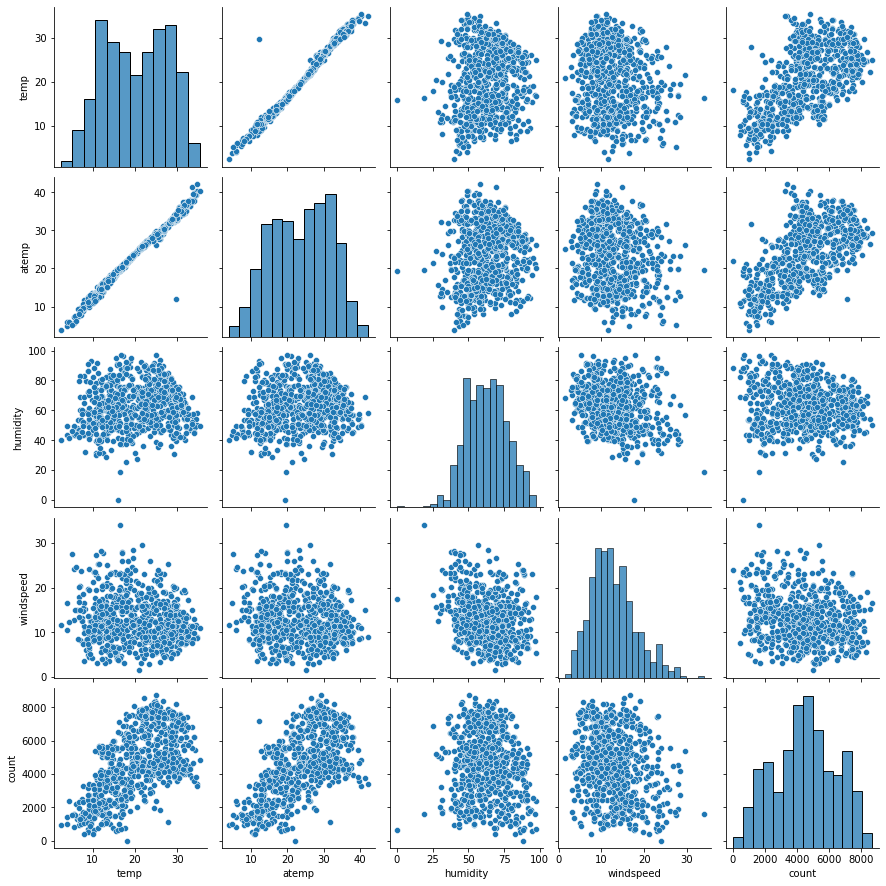

In [445]:
plt.figure(figsize = (20,12))
sns.pairplot(bike_data, palette= 'YlGnBu')
plt.show()

1. We see that temp and atemp are highly correlated. 
2. We also see that the target variable 'count' is positively correlated with temp and atemp. 

### Visualization of Categorical variables

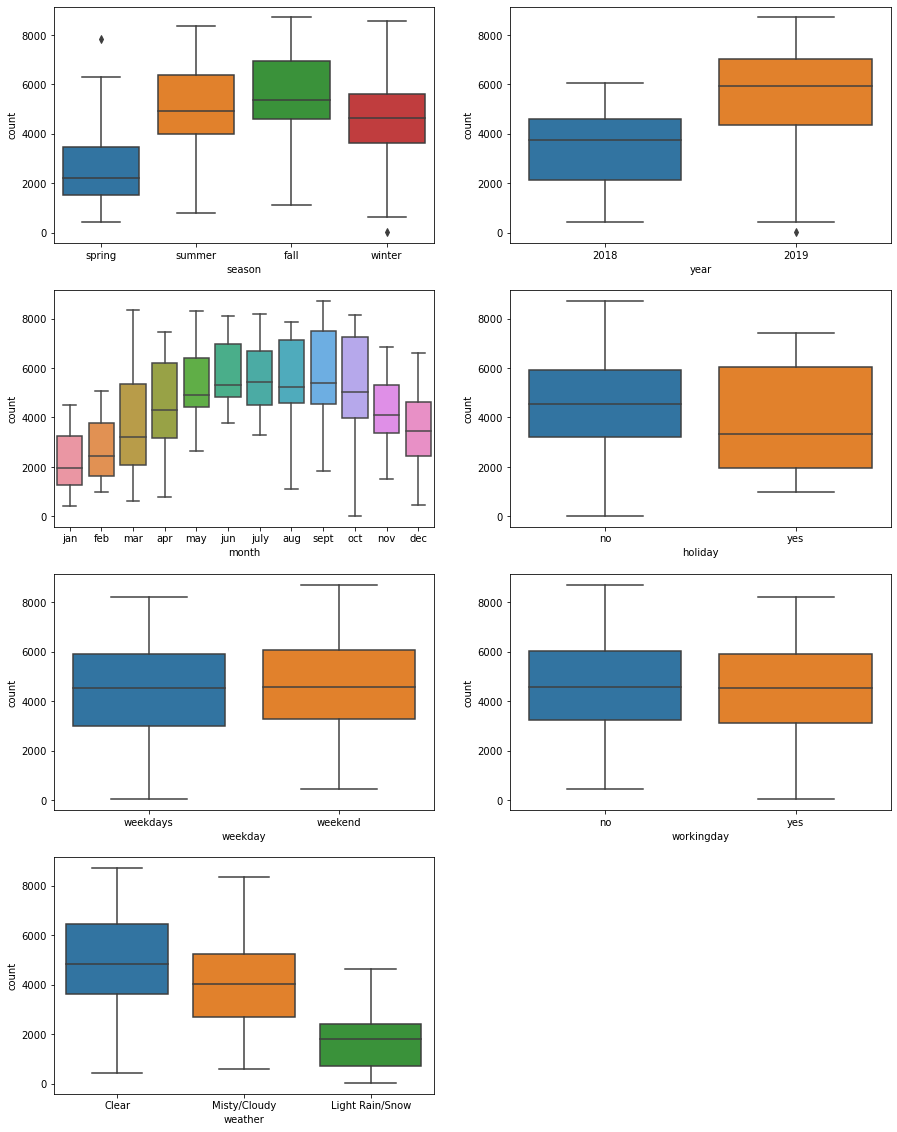

In [446]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'count', data = bike_data)

plt.subplot(4,2,2)
sns.boxplot(x = 'year', y = 'count', data = bike_data)

plt.subplot(4,2,3)
sns.boxplot(x = 'month', y = 'count', data = bike_data)

plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike_data)

plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike_data)

plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike_data)

plt.subplot(4,2,7)
sns.boxplot(x = 'weather', y = 'count', data = bike_data)

plt.show()

1. From the visualization of categorical variables we see that count is highest during fall season and then during summer and winter. We see less demand in the season of spring.

2. particulary in the months of June, July, August and September. 

3. We also see that in the year 2019 the count has increased tremendously, we can say that increase in popularity might have been the reason for it.

4. The demand is also more when there is clear weather in the sky and then during misty/cloudy weather. 

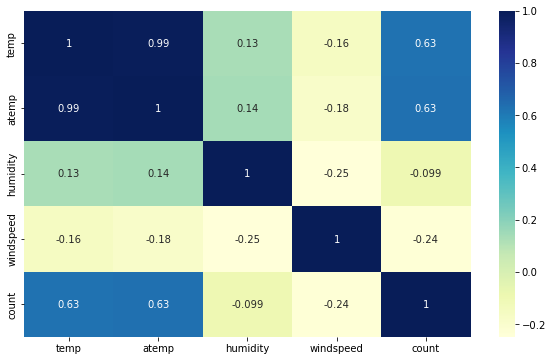

In [447]:
plt.figure(figsize = (10,6))
sns.heatmap(bike_data.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [448]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,jan,no,weekdays,yes,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,no,weekdays,yes,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,no,weekdays,yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,no,weekdays,yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,no,weekdays,yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2 - Preparing the data for Modelling 

 1. Encoding - 
     - Conver the binary variables to 0/1
     - other categorical variables to dummy variables.
     
 2. Splittling the data into train and test
 
 3. Rescaling variables 

### Dummy Variables and Encoding

In [449]:
# Yes/No variable 
var_list = ['holiday', 'workingday']

bike_data[var_list] = bike_data[var_list].apply(lambda x: x.map({'yes':1, 'no':0}))
bike_data[var_list].head()

,holiday,workingday
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [450]:
bike_data['year'] = bike_data['year'].map({'2018':0, '2019':1})

In [451]:
### Creating dummy variables 
season_status = pd.get_dummies(bike_data['season'], drop_first= True)
weather_status = pd.get_dummies(bike_data['weather'], drop_first=True)
month_status = pd.get_dummies(bike_data['month'], drop_first=True)
weekday_status = pd.get_dummies(bike_data['weekday'], drop_first=True)

In [452]:
bike_data = pd.concat([bike_data, season_status, weather_status, month_status, weekday_status], axis = 1)

In [456]:
pd.set_option('display.max_columns', 40)

In [457]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,summer,fall,winter,Misty/Cloudy,Light Rain/Snow,feb,mar,apr,may,jun,july,aug,sept,oct,nov,dec,weekend
0,spring,0,jan,0,weekdays,1,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,spring,0,jan,0,weekdays,1,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,spring,0,jan,0,weekdays,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,spring,0,jan,0,weekdays,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,0,jan,0,weekdays,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [458]:
# dropping the variable season
bike_data = bike_data.drop(['season', 'month', 'weather', 'weekday' ], axis = 1)

In [459]:
bike_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,summer,fall,winter,Misty/Cloudy,Light Rain/Snow,feb,mar,apr,may,jun,july,aug,sept,oct,nov,dec,weekend
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train Test Split 

In [460]:
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 25)
(220, 25)


### Scaling the variables 

In [462]:
# Instantiate an object
scaler = MinMaxScaler()

# Numeric variables to be scaled 
num_vars = ['temp','atemp','humidity','windspeed','count']

# fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,summer,fall,winter,Misty/Cloudy,Light Rain/Snow,feb,mar,apr,may,jun,july,aug,sept,oct,nov,dec,weekend
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


# Step 3 - Training the model 

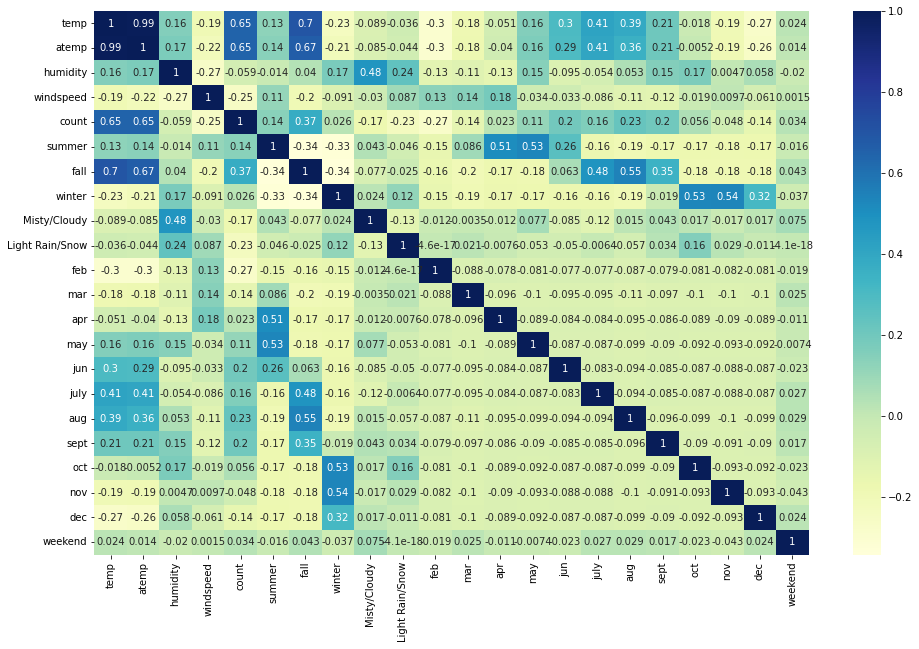

In [463]:
## correlation heatmap
plt.figure(figsize = (16,10))
sns.heatmap(bike_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Creating X_train and y_train

In [464]:
y_train = bike_train.pop('count')
X_train = bike_train

In [465]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,summer,fall,winter,Misty/Cloudy,Light Rain/Snow,feb,mar,apr,may,jun,july,aug,sept,oct,nov,dec,weekend
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


### Building the model

In [466]:
# Running RFE with the output number of the variable equal to 15
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rfe = RFE(lr_model, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [467]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Misty/Cloudy', True, 1),
 ('Light Rain/Snow', True, 1),
 ('feb', False, 7),
 ('mar', True, 1),
 ('apr', False, 3),
 ('may', True, 1),
 ('jun', False, 2),
 ('july', False, 8),
 ('aug', True, 1),
 ('sept', True, 1),
 ('oct', True, 1),
 ('nov', False, 9),
 ('dec', False, 10),
 ('weekend', False, 6)]

In [468]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'summer', 'fall',
       'winter', 'Misty/Cloudy', 'Light Rain/Snow', 'mar', 'may', 'aug',
       'sept', 'oct'],
      dtype='object')

In [469]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'feb', 'apr', 'jun', 'july', 'nov', 'dec',
       'weekend'],
      dtype='object')

## Building the model using statsmodel 

#### Model 1

In [470]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [471]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [472]:
lr = sm.OLS(y_train, X_train_rfe)

lr_model = lr.fit()

In [473]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.00e-188
Time:                        20:26:45   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2374      0.027      8.665      0.000       0.184       0.291
year                0.2304      0.008     28.453      0.000       0.215       0.246
holiday            -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp                0.4869      0.034     14.119      0.000       0.419       0.555
humidity           -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed          -0.1839      0.026     -7.162      0.000      -0.234      -0.133
summer              0.1166      0.015      7.527      0.000       0.086       0.147
fall                0.0425      0.023      1.847      0.065      -0.003       0.088
winter              0.1530      0.014     10.801      0.000       0.125       0.181
Misty/Cloudy       -0.0542      0.010     -5.187      0.000      -0.075      -0.034
Light Rain/Snow    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
mar                 0.0323      0.015      2.196      0.029       0.003       0.061
may                 0.0282      0.018      1.581      0.115      -0.007       0.063
aug                 0.0509      0.017      2.913      0.004       0.017       0.085
sept                0.1207      0.017      6.984      0.000       0.087       0.155
oct                 0.0407      0.018      2.314      0.021       0.006       0.075
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [474]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,47.52
7,fall,6.49
3,temp,3.83
6,summer,2.83
8,winter,2.36
4,humidity,1.93
13,aug,1.68
9,Misty/Cloudy,1.56
12,may,1.56
15,oct,1.52


#### Model 2

In [475]:
## dropping 'may' as it has very high p-value
X = X_train_rfe.drop('may', axis = 1)

## Adding all variables to the model
X_train_sm = sm.add_constant(X)

## Create model
lr = sm.OLS(y_train, X_train_sm)

## fit 
lr_model = lr.fit()

## summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.46e-189
Time:                        20:27:36   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2322      0.027      8.525      0.000       0.179       0.286
year                0.2298      0.008     28.366      0.000       0.214       0.246
holiday            -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp                0.4965      0.034     14.604      0.000       0.430       0.563
humidity           -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed          -0.1858      0.026     -7.234      0.000      -0.236      -0.135
summer              0.1225      0.015      8.137      0.000       0.093       0.152
fall                0.0361      0.023      1.593      0.112      -0.008       0.081
winter              0.1502      0.014     10.671      0.000       0.123       0.178
Misty/Cloudy       -0.0544      0.010     -5.199      0.000      -0.075      -0.034
Light Rain/Snow    -0.2449      0.026     -9.259      0.000      -0.297      -0.193
mar                 0.0279      0.014      1.931      0.054      -0.000       0.056
aug                 0.0505      0.018      2.883      0.004       0.016       0.085
sept                0.1202      0.017      6.946      0.000       0.086       0.154
oct                 0.0393      0.018      2.231      0.026       0.005       0.074
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [476]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,46.85
7,fall,6.29
3,temp,3.72
6,summer,2.66
8,winter,2.33
4,humidity,1.90
12,aug,1.68
9,Misty/Cloudy,1.56
14,oct,1.51
13,sept,1.40


#### Model 3

In [477]:
## dropping fall as it has high p-value as well as high VIF
X = X.drop('fall', axis = 1)

## Adding all variables to the model
X_train_sm = sm.add_constant(X)

## Create model
lr = sm.OLS(y_train, X_train_sm)

## fit 
lr_model = lr.fit()

## summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          5.94e-190
Time:                        20:28:03   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2326      0.027      8.525      0.000       0.179       0.286
year                0.2287      0.008     28.289      0.000       0.213       0.245
holiday            -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp                0.5371      0.023     23.855      0.000       0.493       0.581
humidity           -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed          -0.1893      0.026     -7.388      0.000      -0.240      -0.139
summer              0.1059      0.011      9.743      0.000       0.085       0.127
winter              0.1393      0.012     11.304      0.000       0.115       0.163
Misty/Cloudy       -0.0532      0.010     -5.093      0.000      -0.074      -0.033
Light Rain/Snow    -0.2401      0.026     -9.123      0.000      -0.292      -0.188
mar                 0.0233      0.014      1.642      0.101      -0.005       0.051
aug                 0.0605      0.016      3.699      0.000       0.028       0.093
sept                0.1292      0.016      7.897      0.000       0.097       0.161
oct                 0.0355      0.017      2.032      0.043       0.001       0.070
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [478]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,46.85
4,humidity,1.86
7,winter,1.78
3,temp,1.62
8,Misty/Cloudy,1.55
13,oct,1.48
11,aug,1.46
6,summer,1.38
12,sept,1.25
9,Light Rain/Snow,1.24


#### Model 4

In [479]:
## dropping mar as it has high p-value
X = X.drop('mar', axis = 1)

## Adding all variables to the model
X_train_sm = sm.add_constant(X)

## Create model
lr = sm.OLS(y_train, X_train_sm)

## fit 
lr_model = lr.fit()

## summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.49e-190
Time:                        20:28:40   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2390      0.027      8.838      0.000       0.186       0.292
year                0.2289      0.008     28.264      0.000       0.213       0.245
holiday            -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp                0.5316      0.022     23.836      0.000       0.488       0.575
humidity           -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed          -0.1868      0.026     -7.291      0.000      -0.237      -0.136
summer              0.1058      0.011      9.719      0.000       0.084       0.127
winter              0.1353      0.012     11.180      0.000       0.112       0.159
Misty/Cloudy       -0.0531      0.010     -5.073      0.000      -0.074      -0.033
Light Rain/Snow    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
aug                 0.0585      0.016      3.583      0.000       0.026       0.091
sept                0.1277      0.016      7.803      0.000       0.096       0.160
oct                 0.0358      0.018      2.046      0.041       0.001       0.070
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [480]:
## calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,45.88
4,humidity,1.86
7,winter,1.71
3,temp,1.59
8,Misty/Cloudy,1.55
12,oct,1.48
10,aug,1.45
6,summer,1.38
9,Light Rain/Snow,1.24
11,sept,1.24


Now we can finalise this model as p value for all features are less than 0.05 and VIF is also less than 5. 

In [481]:
X = X.drop('const', axis = 1) 

In [482]:
X.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'summer', 'winter',
       'Misty/Cloudy', 'Light Rain/Snow', 'aug', 'sept', 'oct'],
      dtype='object')

## Step 4 - Residual Analysis 

In [483]:
y_train_pred = lr_model.predict(X_train_sm)

In [484]:
res = y_train - y_train_pred ## residual 

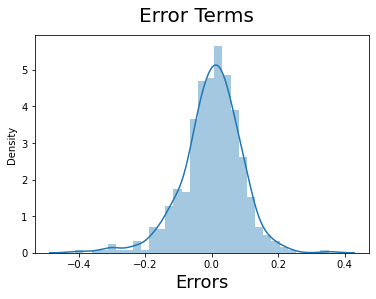

In [485]:
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     
plt.show()

Text(0, 0.5, 'residual')

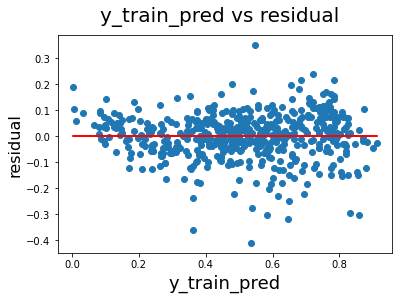

In [504]:
fig = plt.figure()
plt.scatter(y_train_pred,res)
plt.plot(y_train_pred, [0]*len(y_train_pred), c= 'r')
fig.suptitle('y_train_pred vs residual', fontsize=20)             
plt.xlabel('y_train_pred', fontsize=18)
plt.ylabel('residual', fontsize=16) 

We can validate our assumption that error terms have a normal distribution with mean zero. We also see that error terms have constant variance. 

## Making Predictions 

#### Scaling the test dataset 

In [487]:
## Numeric variables to be scaled 
num_vars = ['temp','atemp','humidity','windspeed','count']

### 2. fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,summer,fall,winter,Misty/Cloudy,Light Rain/Snow,feb,mar,apr,may,jun,july,aug,sept,oct,nov,dec,weekend
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


#### Creating X_test and y_test 

In [488]:
y_test = bike_test.pop('count')
X_test = bike_test

In [489]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [490]:
# Making predictions
y_test_pred = lr_model.predict(X_test_new)

### Model Evaluation 

R - squared for test data 

In [378]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.8116537323246352

Adjusted R - squared for test dataset 

In [492]:
adj_r2 = 1-(1-r2)*(220-1)/(220-12-1)
adj_r2

0.8007351081115706

Text(0, 0.5, 'y_pred')

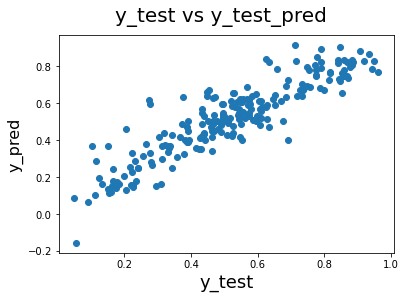

In [493]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)   

In [494]:
res_test = y_test - y_test_pred

Text(0, 0.5, 'residual')

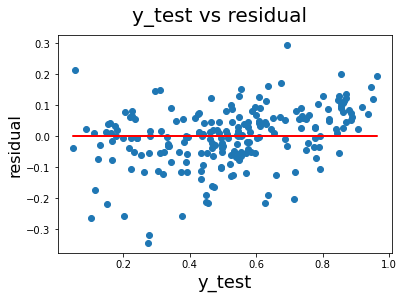

In [502]:
fig = plt.figure()
plt.scatter(y_test,res_test)
plt.plot(y_test, [0]*len(y_test), c= 'r')
fig.suptitle('y_test vs residual', fontsize=20)             
plt.xlabel('y_test', fontsize=18)
plt.ylabel('residual', fontsize=16) 

Text(0, 0.5, 'residual')

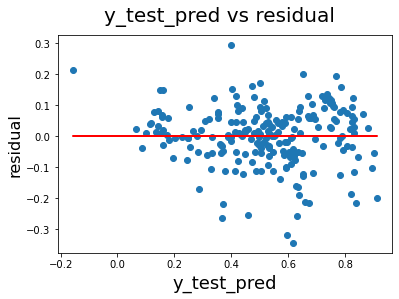

In [496]:
fig = plt.figure()
plt.scatter(y_test_pred,res_test)
plt.plot(y_test_pred, [0]*len(y_test_pred), c= 'r')
fig.suptitle('y_test_pred vs residual', fontsize=20)             
plt.xlabel('y_test_pred', fontsize=18)
plt.ylabel('residual', fontsize=16) 

Upon drawing a plot of residuals against y_test and y_test_pred and a straight line y = 0 is drawn which shows that there is almost constant variance in the data and it does not form a funnel shape which signifies heteroscedasticity. 


### RMSE 

Train RMSE

In [497]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.08901647818063346

Test RMSE

In [498]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09489805628577247

## Results

In [499]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.49e-190
Time:                        20:33:37   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2390      0.027      8.838      0.000       0.186       0.292
year                0.2289      0.008     28.264      0.000       0.213       0.245
holiday            -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp                0.5316      0.022     23.836      0.000       0.488       0.575
humidity           -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed          -0.1868      0.026     -7.291      0.000      -0.237      -0.136
summer              0.1058      0.011      9.719      0.000       0.084       0.127
winter              0.1353      0.012     11.180      0.000       0.112       0.159
Misty/Cloudy       -0.0531      0.010     -5.073      0.000      -0.074      -0.033
Light Rain/Snow    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
aug                 0.0585      0.016      3.583      0.000       0.026       0.091
sept                0.1277      0.016      7.803      0.000       0.096       0.160
oct                 0.0358      0.018      2.046      0.041       0.001       0.070
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Equation of the best fit line: 
y = 0.2390 + 0.2289(year) - 0.0941(holiday) + 0.5316(temp) - 0.1818(humidity) - 0.1868(windspeed) + 0.1058(summer) + 0.1353(winter) - 0.0531(Misty/Cloudy) - 0.2385(Light Rain/Snow) + 0.0585(aug) + 0.1277(sept) + 0.0358(oct)


In [500]:
results = pd.DataFrame({"Model Performance Metrics":["R-Squared","Adjusted R-Squared","RMSE"],
                         "Train Set":[0.842,0.839,0.0890],
                         "Test Set":[0.812,0.801,0.0948]})

In [501]:
results

,Model Performance Metrics,Train Set,Test Set
0,R-Squared,0.842,0.8120
1,Adjusted R-Squared,0.839,0.8010
2,RMSE,0.089,0.0948


## Statistically Significant features that affect the target variable. 
### 1. Temperature 
### 2. Year
### 3. Winter season
### 4. Summer season
### 5. Month of August, September and October
### 6. Misty/Cloudy or light rain/snow weather
### 7. Holiday
### 8. Windspeed
### 9. Humidity